In [17]:
from notebooks.util.distribution_utils import *
from hurst_exponent.util.utils import augmented_dickey_fuller
from liquidity.response_functions.features import compute_intraday_features

In [18]:
# Automatically reload changes in package dependencies
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Number of events to use
EVENTS_RANGE = 500000

# Bin/window size for computing events
T = 1000

## Load market orders raw sample data

In [20]:
# Load orderbook raw sample data
stocks = ['TSLA', 'AMZN', 'NFLX', 'MSFT', 'EBAY', 'APPL']

current_dir = os.path.abspath('.')
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'market_orders')

stock_dfs = {}

# Loop through each stock
for stock in stocks:

    filename = f"{stock}-2016.csv"

    stock_file_path = os.path.join(data_dir, filename)

    # Read the CSV and store in the dictionary
    stock_dfs[stock] = pd.read_csv(stock_file_path)

# Access the dataframe using stock's ticker as key
tsla_raw_df = stock_dfs['TSLA']
amzn_raw_df = stock_dfs['AMZN']
nflx_raw_df = stock_dfs['NFLX']
msft_raw_df = stock_dfs['MSFT']
ebay_raw_df = stock_dfs['EBAY']
appl_raw_df = stock_dfs['APPL']

Index(['Unnamed: 0', 'event_timestamp', 'sign', 'side', 'lob_action',
       'order_executed', 'execution_price', 'size', 'ask', 'bid', 'midprice',
       'ask_volume', 'bid_volume', 'price_changing', 'midprice_change', 'R1',
       'date', 'daily_R1', 'daily_vol', 'daily_num', 'norm_size',
       'signed_volume'],
      dtype='object')

## 1. Orderflow

### 1.1. Size/ Volume

In [22]:
# Order size/ volume
size_volume = {'TSLA': tsla_raw_df['norm_size'],
               'MSFT': amzn_raw_df['norm_size'],
               'AMZN': nflx_raw_df['norm_size'],
               'NFLX': msft_raw_df['norm_size'],
               'EBAY': ebay_raw_df['norm_size'],
               'APPL': appl_raw_df['norm_size'],
               }
# Update the dictionary to only keep the first EVENTS_RANGE items
#size_volume = {stock: data.head(EVENTS_RANGE) for stock, data in size_volume.items()}

#### Stationarity Test

In [23]:
# ADF test
for stock, data in size_volume.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -57.52
p-value: 0.00,
N: 499899, 
critical values: {'1%': -3.4303630813095825, '5%': -2.8615457817848604, '10%': -2.5667730774328796}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -56.30
p-value: 0.00,
N: 499899, 
critical values: {'1%': -3.4303630813095825, '5%': -2.8615457817848604, '10%': -2.5667730774328796}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -60.69
p-value: 0.00,
N: 499899, 
critical values: {'1%': -3.4303630813095825, '5%': -2.8615457817848604, '10%': -2.5667730774328796}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -50.85
p-value: 0.00,
N: 499898, 
critical values: {'1%': -3.4303630813357504, '5%': -2.8615457817964263, '10%': -2.566773077439036}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.

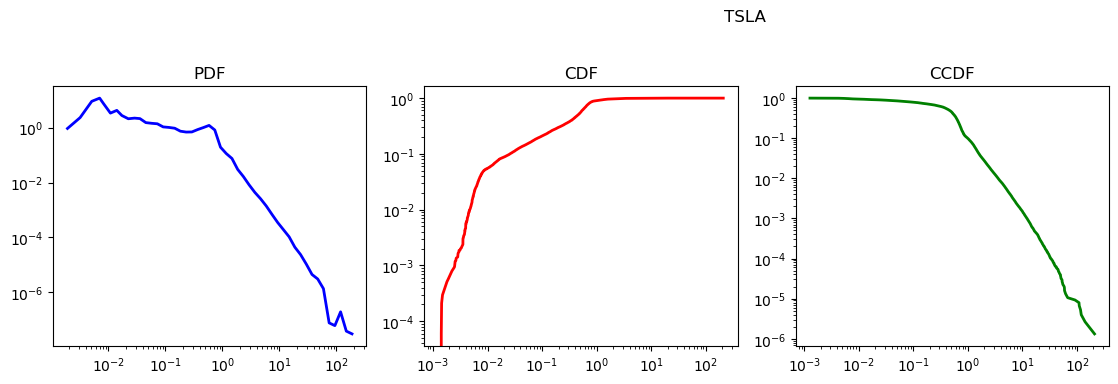

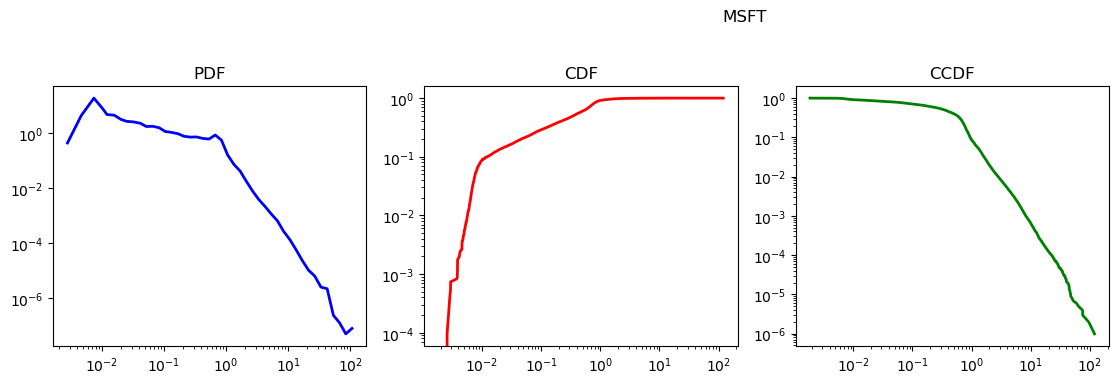

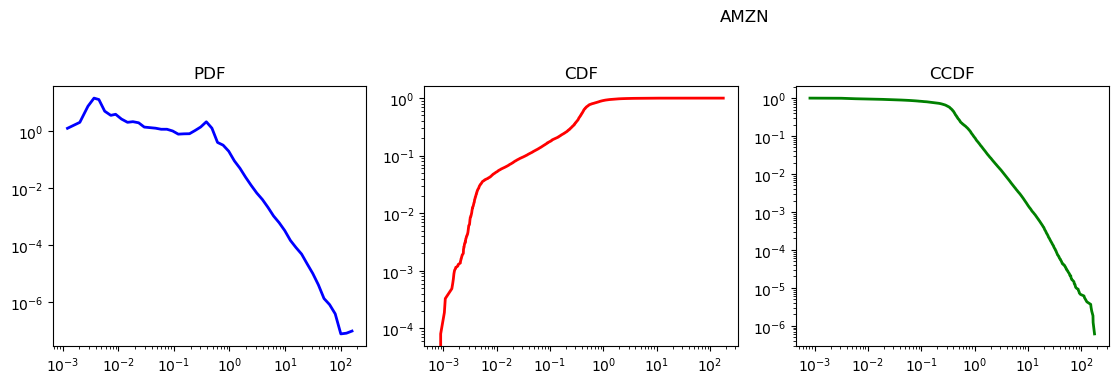

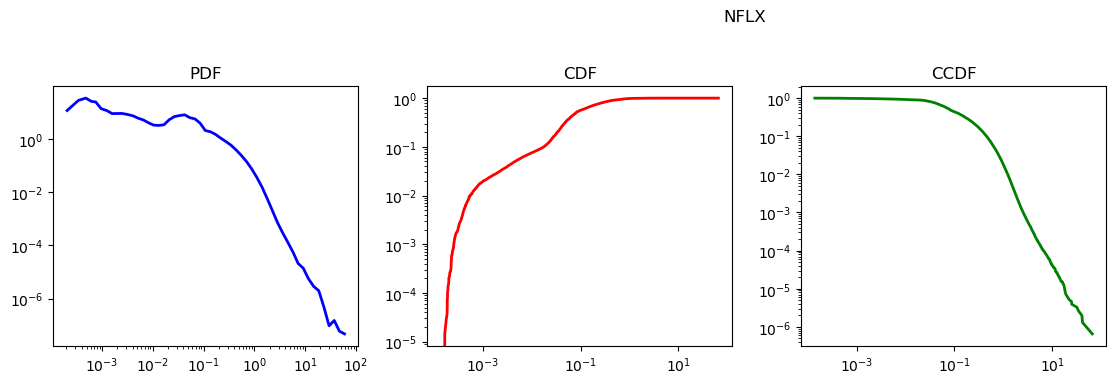

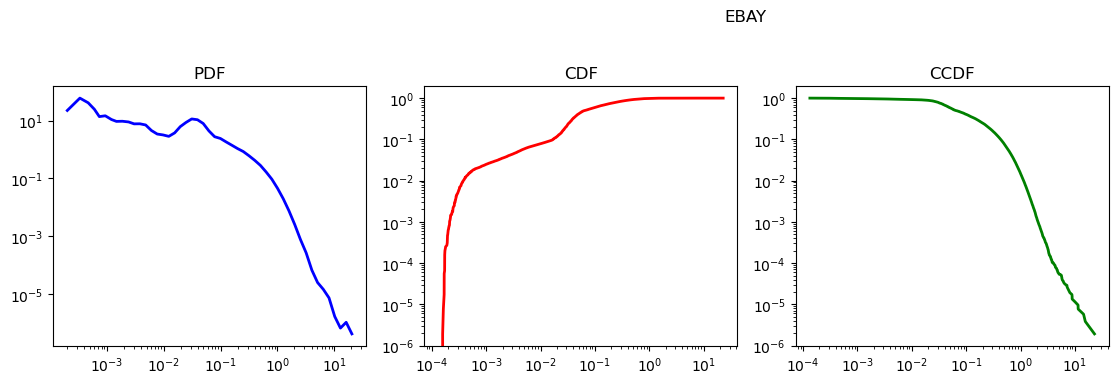

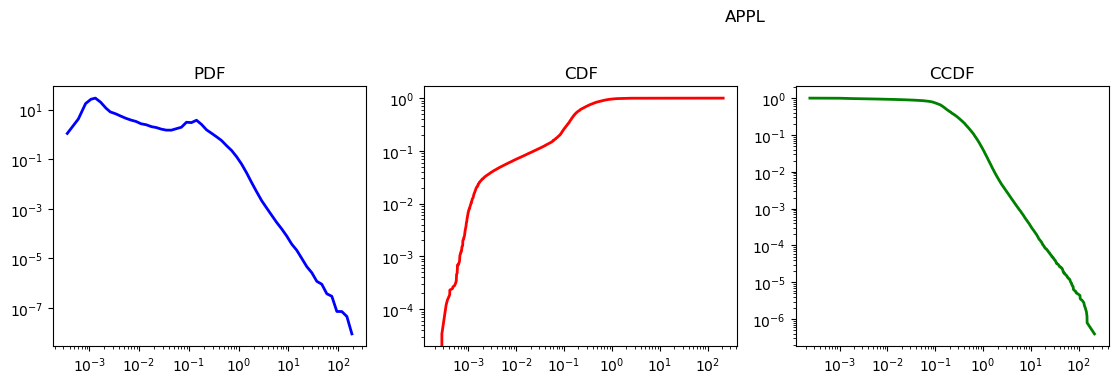

In [24]:
# Plot distribution of size_volume for each stock
for stock_name, data in size_volume.items():
    plot_distributions(stock_name, data)

### 1.2. Fit power law distribution

In [25]:
# 1. Fit Powerlaw and retrieve fitted object/ results
size_volume_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_size_volume_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(size_volume_data):
    volume_fit_objects = fit_powerlaw(data_dict=size_volume, filename=size_volume_data)
else:
    volume_fit_objects = load_fit_objects(size_volume_data)

volume_fit_objects

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


{'TSLA': <powerlaw.Fit at 0x304584610>,
 'MSFT': <powerlaw.Fit at 0x3052738d0>,
 'AMZN': <powerlaw.Fit at 0x36d0db3d0>,
 'NFLX': <powerlaw.Fit at 0x39a7f1190>,
 'EBAY': <powerlaw.Fit at 0x307c61f10>,
 'APPL': <powerlaw.Fit at 0x3030b2b90>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution give

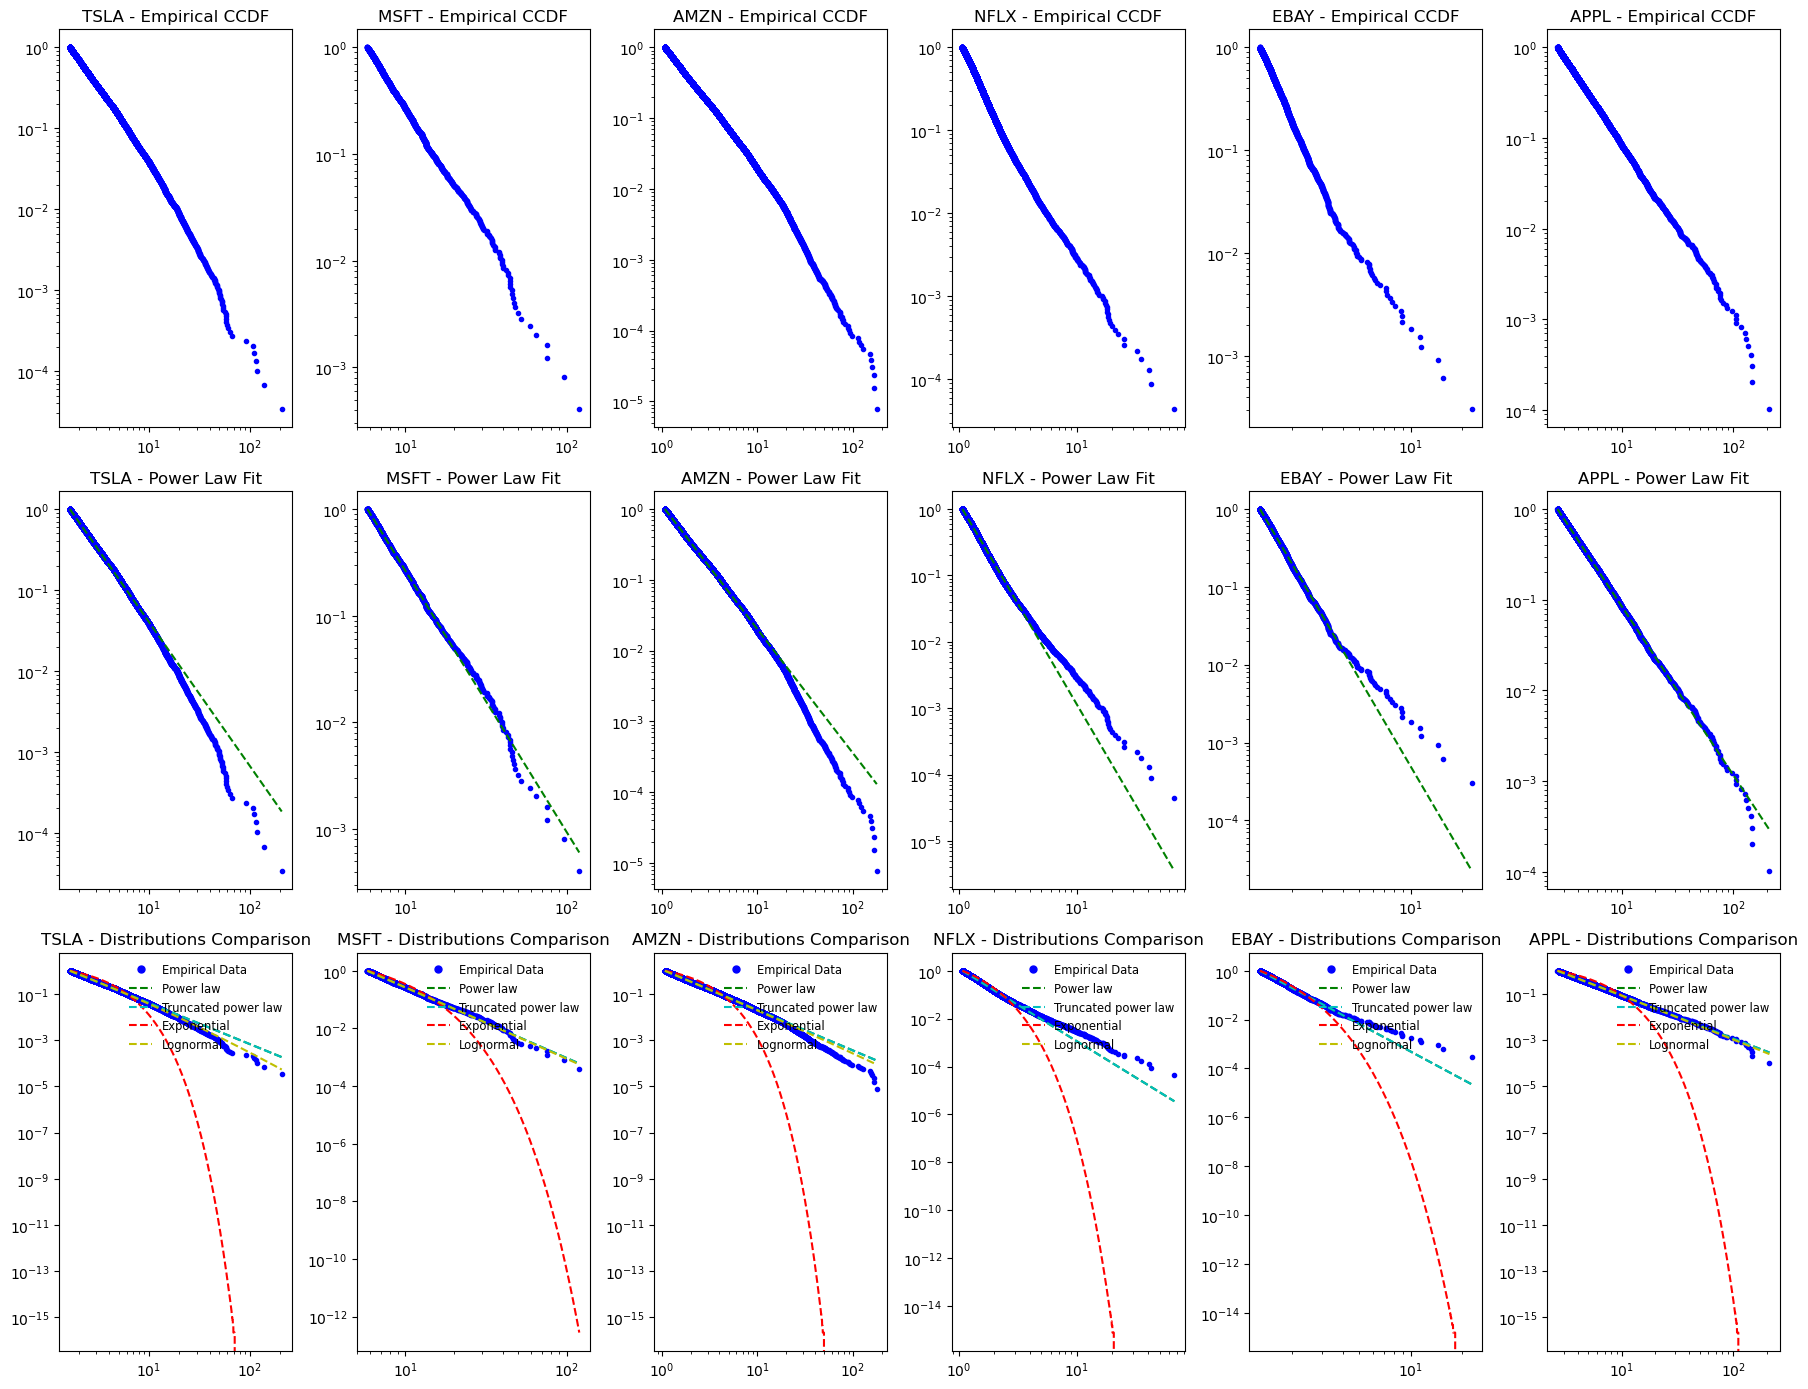

In [26]:
# Plot fitted objects
plot_fit_objects(volume_fit_objects)

#### 1.2.1 Retrieve Power law fitting results

In [27]:
# Get fitting parameters for specific distribution across all stocks
volume_fit_results = get_fitting_params(volume_fit_objects, 'power_law')
print(volume_fit_results)

  Stock Distribution     alpha      xmin  KS Distance
0  TSLA    power_law  2.773168  1.631973     0.010547
1  MSFT    power_law  3.449076  5.802275     0.012647
2  AMZN    power_law  2.750738  1.073492     0.009476
3  NFLX    power_law  4.041382  1.076486     0.013285
4  EBAY    power_law  4.738094  1.303512     0.016053
5  APPL    power_law  2.855940  2.632569     0.005857


In [28]:
# Average Alpha exponents across stocks
min_alpha = volume_fit_results['alpha'].min()
max_alpha = volume_fit_results['alpha'].max()
avg_alpha = volume_fit_results['alpha'].mean()
std_dev_alpha = volume_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 2.750737697211397
Max Alpha: 4.738093763500103
Average Alpha: 3.434732973195194
std_dev_alpha: 0.813326081533806


#### 1.2.2. Compare alternative distributions

In [29]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
volume_comparison = distribution_compare(volume_fit_objects, 'exponential')
display(volume_comparison)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,0.525998,1.631973,2.773168,0.010547,0.161360,21.245735,3.610114e-100
1,MSFT,exponential,0.253783,5.802275,3.449076,0.012647,0.127580,6.889165,5.612069e-12
2,AMZN,exponential,0.752461,1.073492,2.750738,0.009476,0.186283,47.957648,0.000000e+00
3,NFLX,exponential,1.821058,1.076486,4.041382,0.013285,0.104019,12.556958,3.640644e-36
4,EBAY,exponential,2.050198,1.303512,4.738094,0.016053,0.081668,4.613734,3.954985e-06
5,APPL,exponential,0.336098,2.632569,2.855940,0.005857,0.174038,12.989187,1.409159e-38


## 2. Signed Ordeflow Imbalance

In [30]:
# Aggregate orderflow
tsla_aggregate_orderflow = compute_intraday_features(tsla_raw_df, [T])
msft_aggregate_orderflow = compute_intraday_features(msft_raw_df, [T])
amzn_aggregate_orderflow = compute_intraday_features(amzn_raw_df, [T])
nflx_aggregate_orderflow = compute_intraday_features(nflx_raw_df, [T])
ebay_aggregate_orderflow = compute_intraday_features(ebay_raw_df, [T])
appl_aggregate_orderflow = compute_intraday_features(appl_raw_df, [T])

# Order Sign imbalance
sign_imbalance = {
  'TSLA': tsla_aggregate_orderflow['sign_imbalance'],
  'MSFT': msft_aggregate_orderflow['sign_imbalance'],
  'AMZN': amzn_aggregate_orderflow['sign_imbalance'],
  'NFLX': nflx_aggregate_orderflow['sign_imbalance'],
  'EBAY': ebay_aggregate_orderflow['sign_imbalance'],
  'APPL': appl_aggregate_orderflow['sign_imbalance']
}
# Update the dictionary to only keep the first EVENTS_RANGE items
#sign_imbalance = {stock: data.head(EVENTS_RANGE) for stock, data in sign_imbalance.items()}


# Sign Volume Imbalance
volume_imbalance = {
 'TSLA': tsla_aggregate_orderflow['vol_imbalance'],
 'MSFT': msft_aggregate_orderflow['vol_imbalance'],
 'AMZN': amzn_aggregate_orderflow['vol_imbalance'],
 'NFLX': nflx_aggregate_orderflow['vol_imbalance'],
 'EBAY': ebay_aggregate_orderflow['vol_imbalance'],
 'APPL': appl_aggregate_orderflow['vol_imbalance']
}
#volume_imbalance = {stock: data.head(EVENTS_RANGE) for stock, data in volume_imbalance.items()}

### Stationarity Tests

In [31]:
# sign_imbalance ADF test
print('Order-sign Imbalance')
for stock, data in sign_imbalance.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)
print('\n')


Order-sign Imbalance
TSLA
ADF: -6.09
p-value: 0.00,
N: 750, 
critical values: {'1%': -3.439099096730074, '5%': -2.8654013553540745, '10%': -2.568826193777778}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -12.71
p-value: 0.00,
N: 1524, 
critical values: {'1%': -3.4346481290263013, '5%': -2.8634383565975736, '10%': -2.567780658251872}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -7.13
p-value: 0.00,
N: 1007, 
critical values: {'1%': -3.436860474327014, '5%': -2.8644144230916537, '10%': -2.568300476140699}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -10.18
p-value: 0.00,
N: 1628, 
critical values: {'1%': -3.4343731208729635, '5%': -2.8633169753343646, '10%': -2.5677160229913856}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stati

In [32]:
# volume_imbalance ADF test
print('Signed-volume Imbalance')
for stock, data in volume_imbalance.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

Signed-volume Imbalance
TSLA
ADF: -7.91
p-value: 0.00,
N: 752, 
critical values: {'1%': -3.439075747702915, '5%': -2.8653910653234655, '10%': -2.568820711931304}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -12.50
p-value: 0.00,
N: 1525, 
critical values: {'1%': -3.4346453058155175, '5%': -2.8634371105641443, '10%': -2.5677799947325988}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -6.14
p-value: 0.00,
N: 997, 
critical values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -8.63
p-value: 0.00,
N: 1618, 
critical values: {'1%': -3.4343980252647994, '5%': -2.863327967926724, '10%': -2.567721876448667}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be sta

### 2.1. Order Sign Imbalance

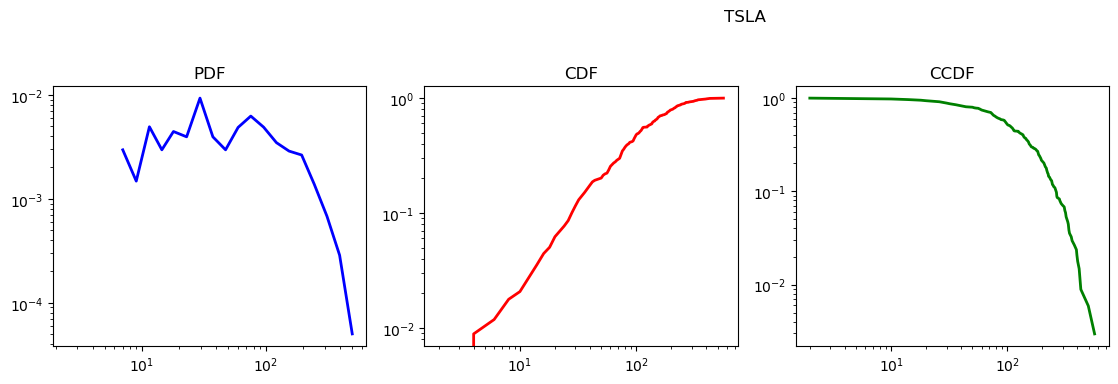

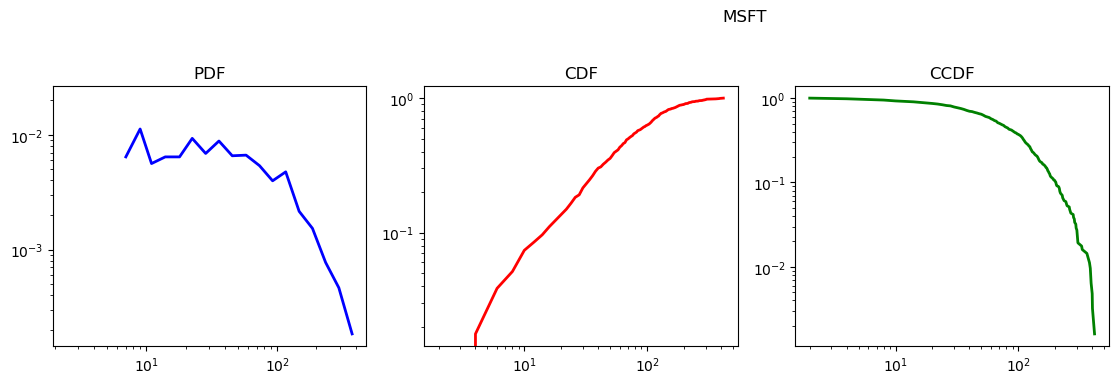

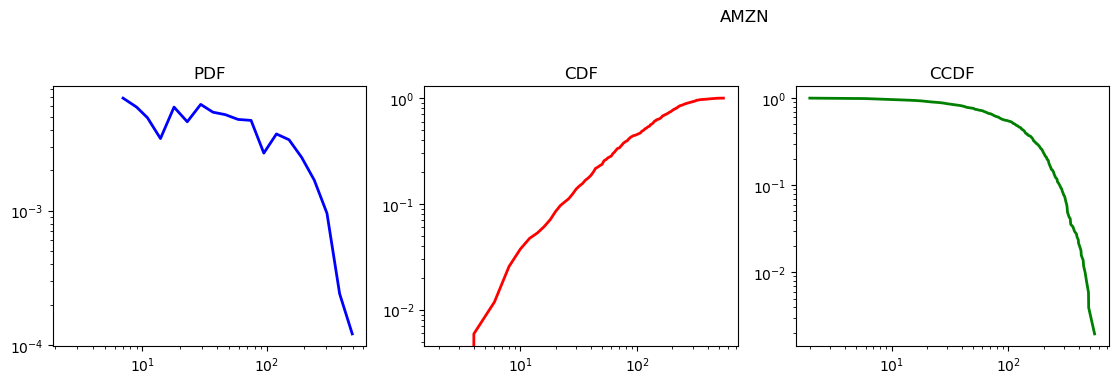

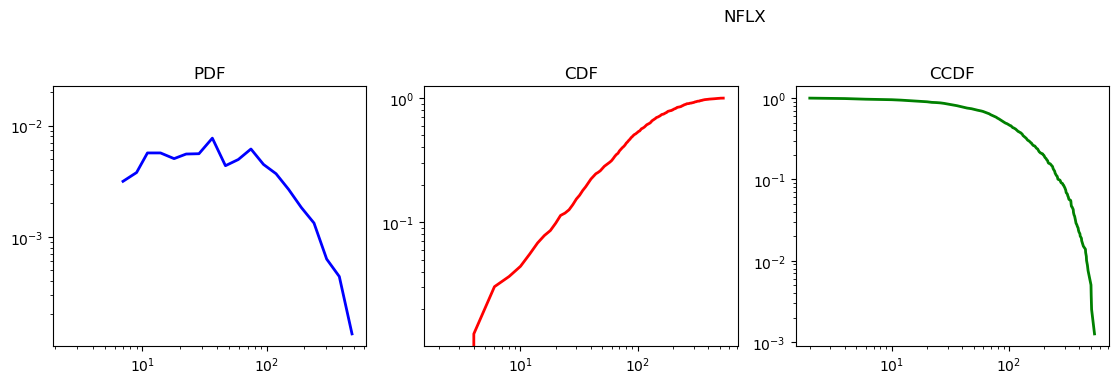

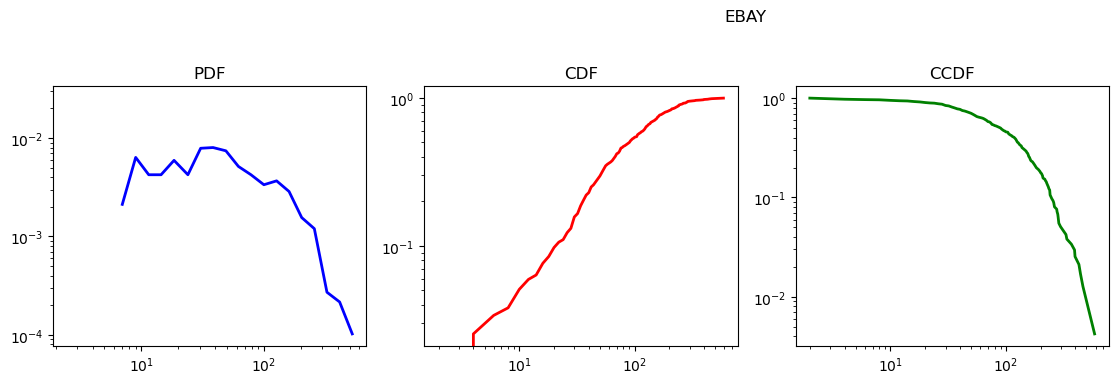

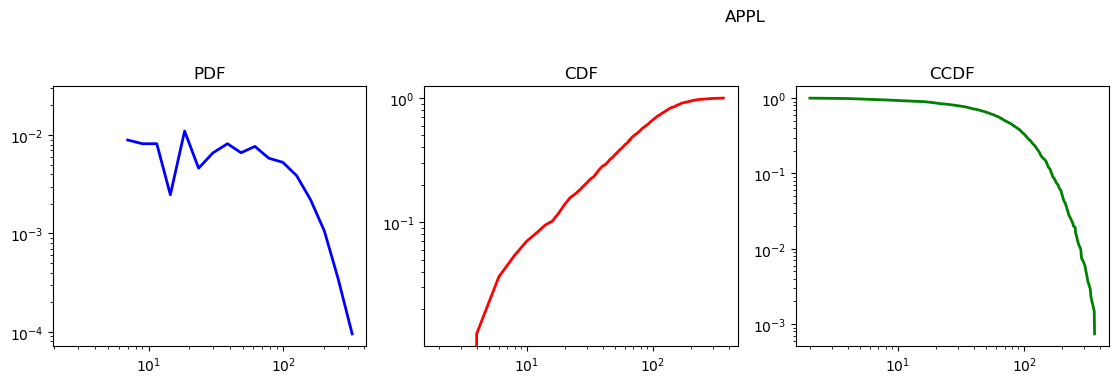

In [33]:
# Plot distribution of sign_imbalance for each stock
for stock_name, data in sign_imbalance.items():
    plot_distributions(stock_name, data)

#### 2.1.1. Fit power law distribution

In [34]:
# 1. Fit Powerlaw and retrieve fitted object/ results
sign_imbalance_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_sign_imbalance_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(sign_imbalance_data):
    sign_imbalance_fit_objects = fit_powerlaw(data_dict=sign_imbalance, filename=sign_imbalance_data)
else:
    sign_imbalance_fit_objects = load_fit_objects(sign_imbalance_data)

sign_imbalance_fit_objects

{'TSLA': <powerlaw.Fit at 0x30867be50>,
 'MSFT': <powerlaw.Fit at 0x3015dd690>,
 'AMZN': <powerlaw.Fit at 0x3016236d0>,
 'NFLX': <powerlaw.Fit at 0x301650a10>,
 'EBAY': <powerlaw.Fit at 0x2bae42d10>,
 'APPL': <powerlaw.Fit at 0x3088b28d0>}

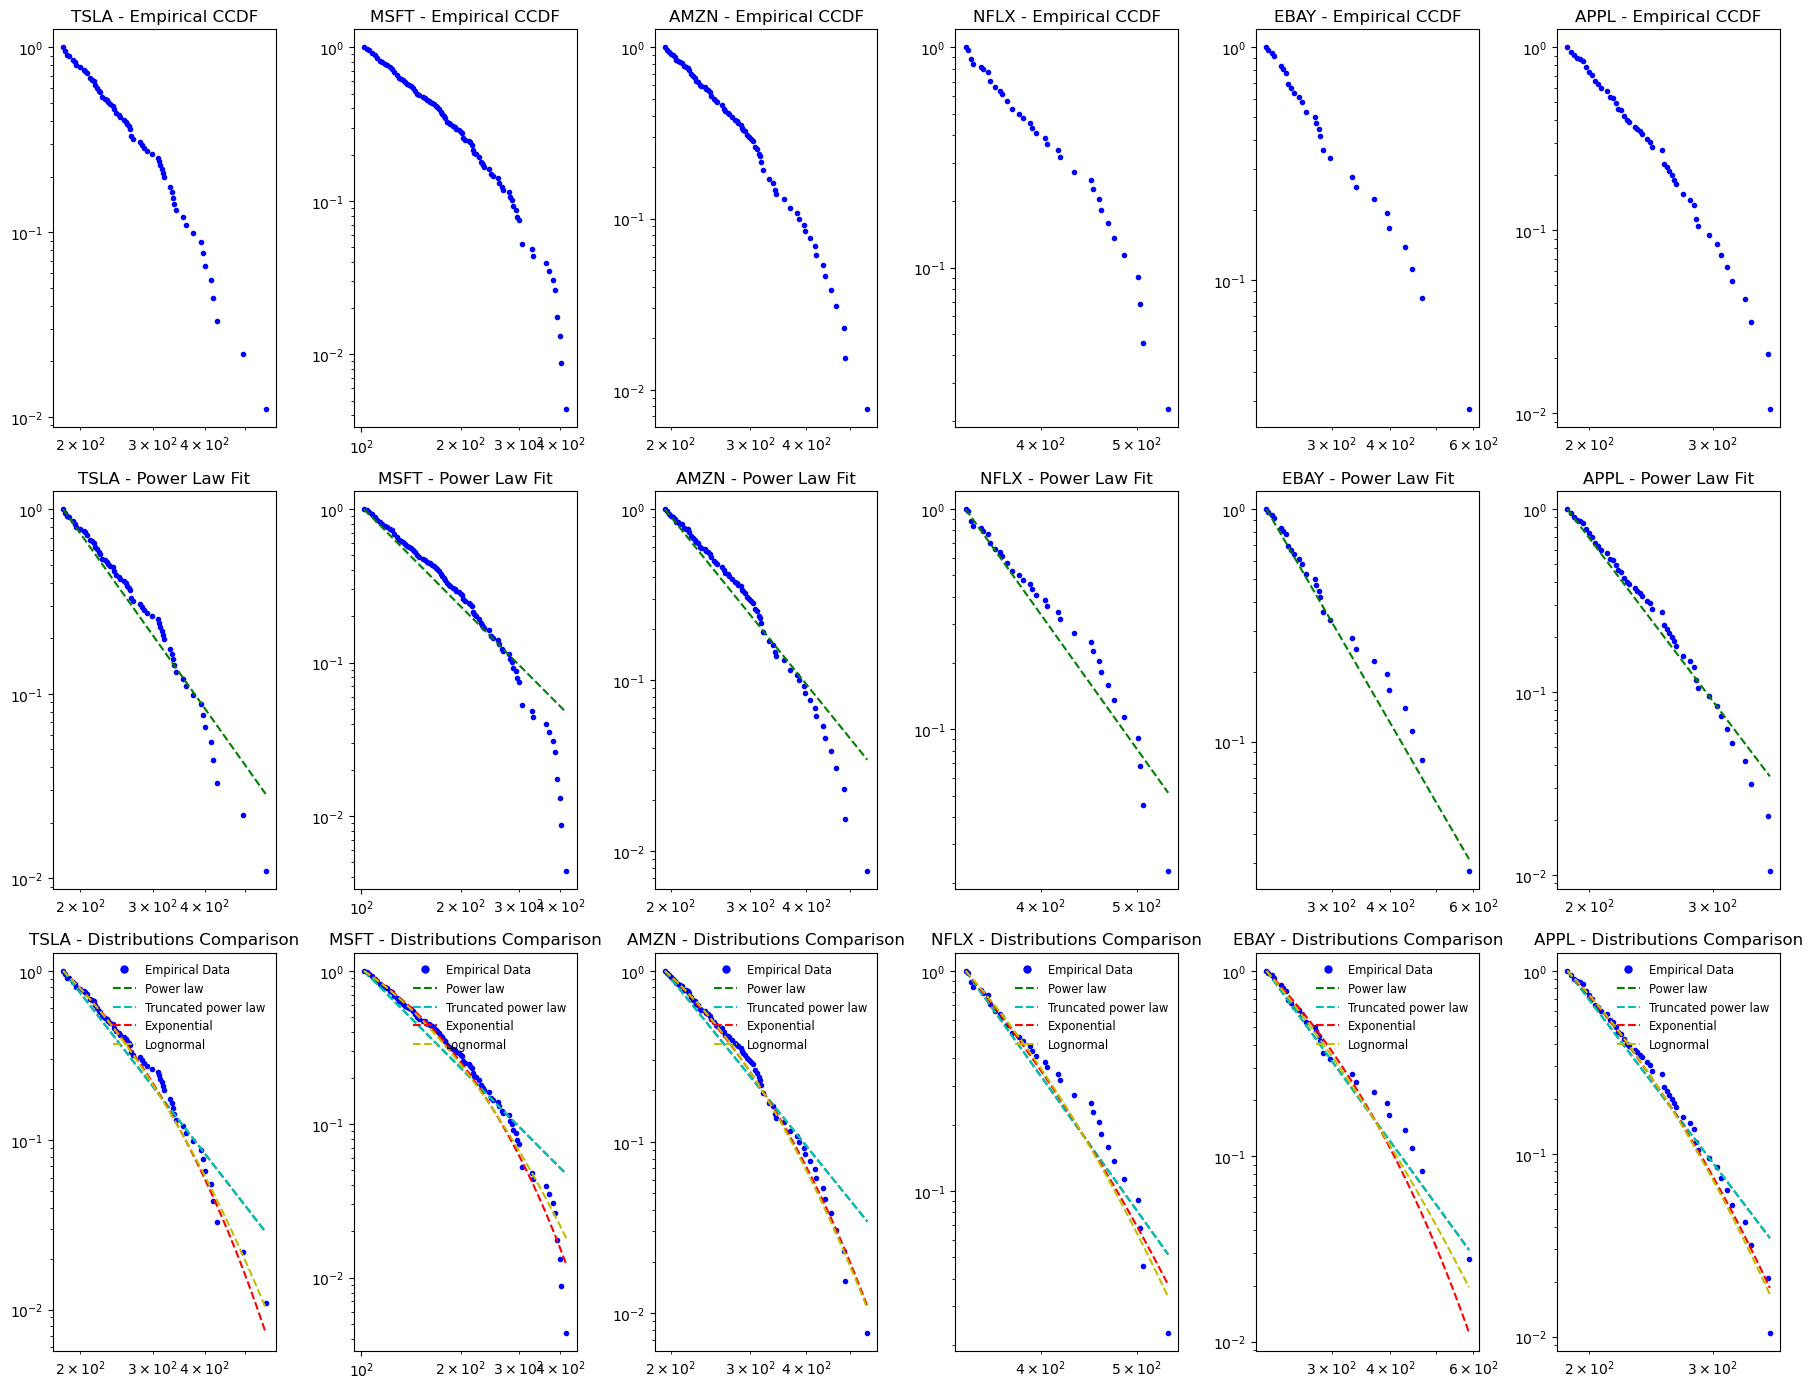

In [35]:
# Plot fitted objects
plot_fit_objects(sign_imbalance_fit_objects)

#### 2.1.2. Retrieve Power law fitting results

In [36]:
# Get fitting parameters for specific distribution across all stocks
sign_imbalance_fit_results = get_fitting_params(sign_imbalance_fit_objects, 'truncated_power_law')
print(sign_imbalance_fit_results)

  Stock         Distribution     alpha    Lambda   xmin  KS Distance
0  TSLA  truncated_power_law  1.000023  0.009728  182.0     0.058464
1  MSFT  truncated_power_law  1.000061  0.009380  102.0     0.039285
2  AMZN  truncated_power_law  1.000067  0.009744  194.0     0.052915
3  NFLX  truncated_power_law  1.000105  0.014031  336.0     0.093594
4  EBAY  truncated_power_law  2.115053  0.006280  218.0     0.072644
5  APPL  truncated_power_law  1.000023  0.018894  186.0     0.061275


In [37]:
# Get fitting parameters for specific distribution across all stocks
sign_imbalance_exp_results = get_fitting_params(sign_imbalance_fit_objects, 'exponential')
print(sign_imbalance_exp_results)

  Stock Distribution    Lambda   xmin  KS Distance
0  TSLA  exponential  0.012943  182.0     0.056967
1  MSFT  exponential  0.013973  102.0     0.044628
2  AMZN  exponential  0.012818  194.0     0.046341
3  NFLX  exponential  0.016260  336.0     0.093329
4  EBAY  exponential  0.012142  218.0     0.076434
5  APPL  exponential  0.022684  186.0     0.059841


In [38]:
# Average Alpha exponents across stocks
min_alpha = sign_imbalance_fit_results['alpha'].min()
max_alpha = sign_imbalance_fit_results['alpha'].max()
avg_alpha = sign_imbalance_fit_results['alpha'].mean()
std_dev_alpha = sign_imbalance_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 1.0000232306459353
Max Alpha: 2.1150529310844712
Average Alpha: 1.1858887039344828
std_dev_alpha: 0.4551956497779748


#### 2.1.3. Compare alternative distributions

In [39]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
sign_imbalance_comparison = distribution_compare(sign_imbalance_fit_objects, 'exponential')
display(sign_imbalance_comparison)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,0.012943,182.0,4.149659,0.076270,0.056967,-1.312683,0.189290
1,MSFT,exponential,0.013973,102.0,3.165799,0.077168,0.044628,-2.613432,0.008964
2,AMZN,exponential,0.012818,194.0,4.259175,0.077773,0.046341,-2.390736,0.016815
3,NFLX,exponential,0.016260,336.0,7.303107,0.091400,0.093329,-1.159683,0.246178
4,EBAY,exponential,0.012142,218.0,4.494107,0.068007,0.076434,-0.193379,0.846662
5,APPL,exponential,0.022684,186.0,6.051746,0.074554,0.059841,-1.574685,0.115329


### 2.2. Volume Imbalance

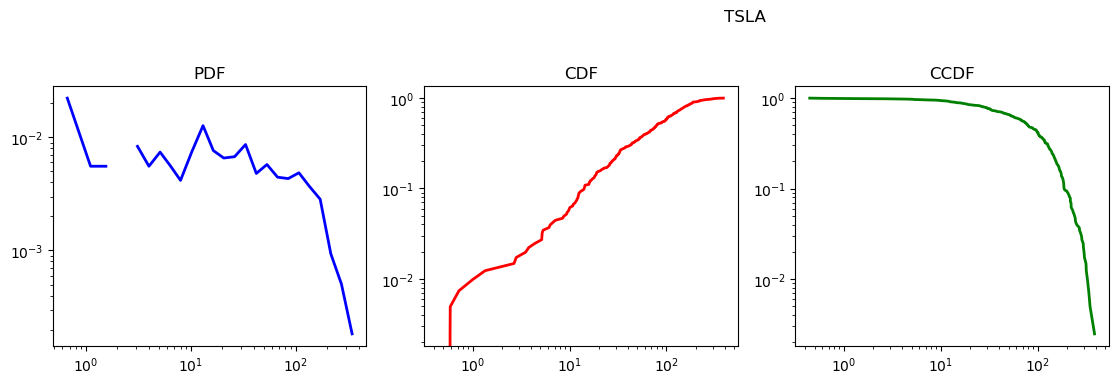

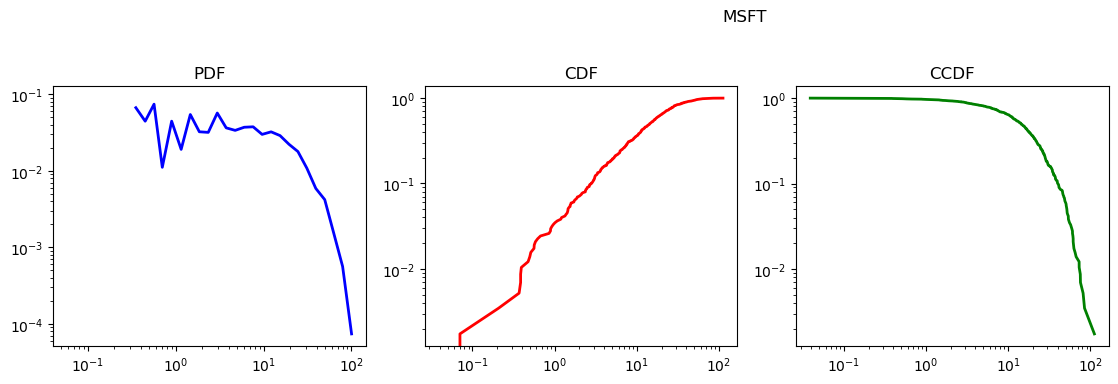

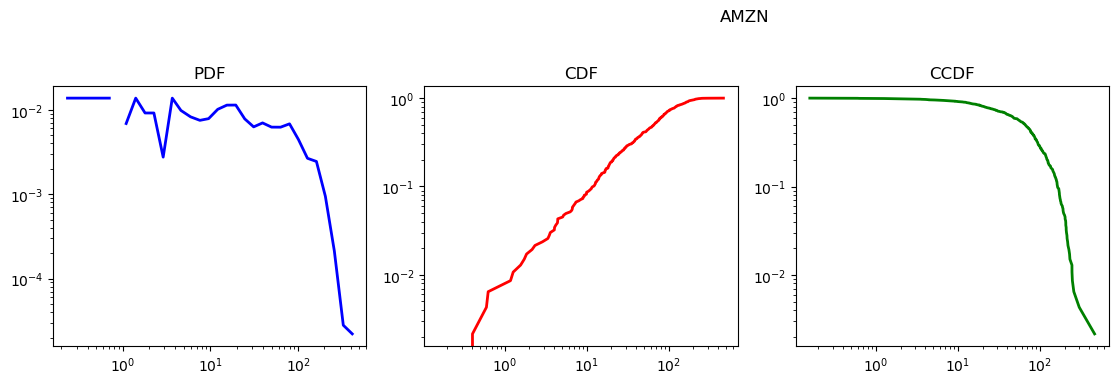

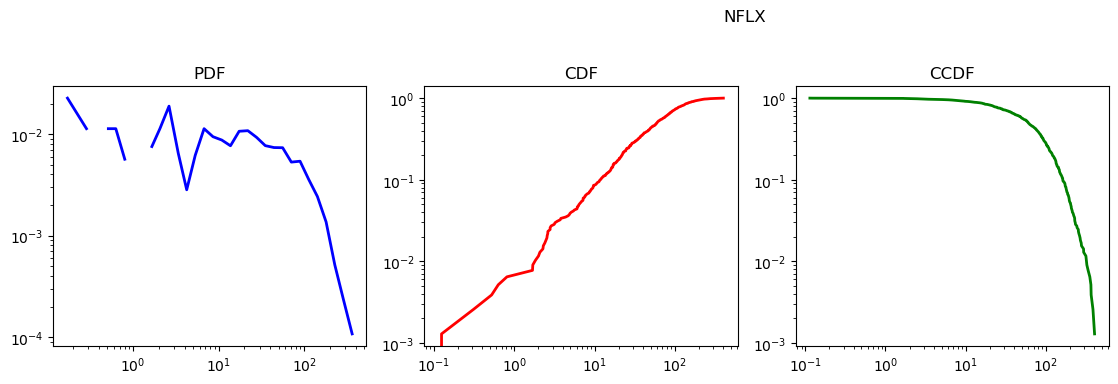

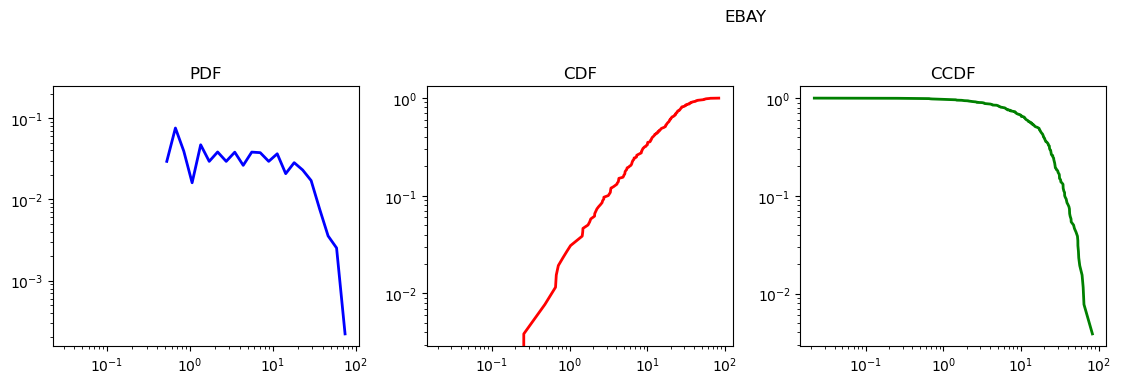

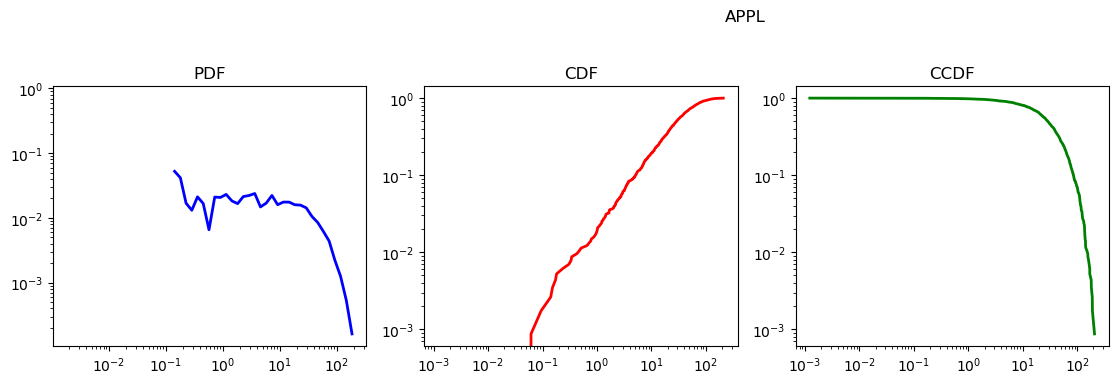

In [40]:
# Plot distribution of volume_imbalance for each stock
for stock_name, data in volume_imbalance.items():
    plot_distributions(stock_name, data)

#### 2.2.1. Fit power law distribution

In [41]:
# 1. Fit Powerlaw and retrieve fitted object/ results
volume_imbalance_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_volume_imbalance_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(volume_imbalance_data):
    volume_imbalance_data_fit_objects = fit_powerlaw(data_dict=volume_imbalance, filename=volume_imbalance_data)
else:
    volume_imbalance_data_fit_objects = load_fit_objects(volume_imbalance_data)

volume_imbalance_data_fit_objects

Calculating best minimal value for power law fit


/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


{'TSLA': <powerlaw.Fit at 0x36d339710>,
 'MSFT': <powerlaw.Fit at 0x36d28a310>,
 'AMZN': <powerlaw.Fit at 0x36d30cf50>,
 'NFLX': <powerlaw.Fit at 0x308a24d10>,
 'EBAY': <powerlaw.Fit at 0x308a258d0>,
 'APPL': <powerlaw.Fit at 0x308a27a50>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


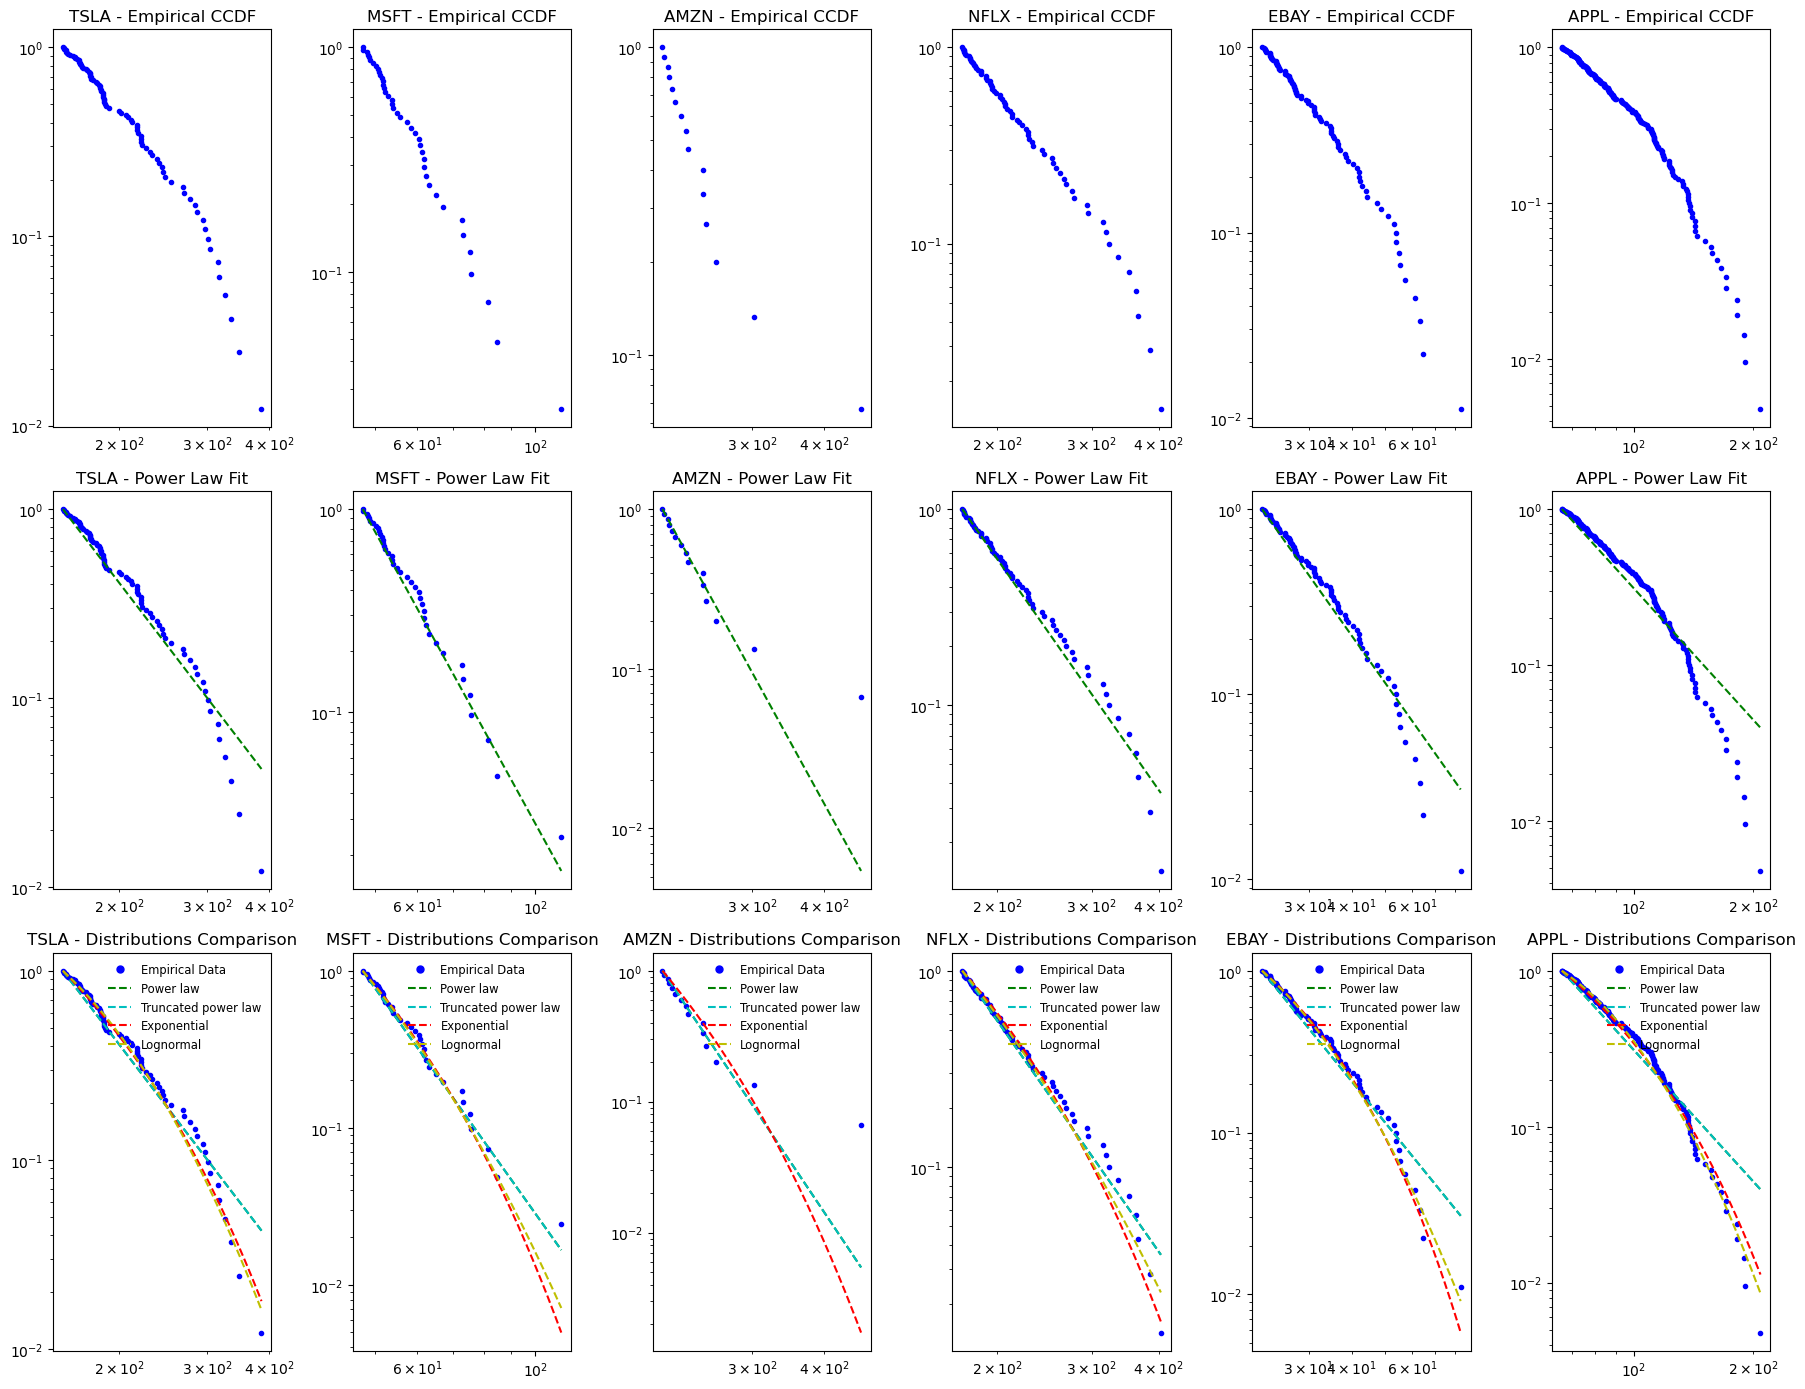

In [42]:
# Plot fitted objects
plot_fit_objects(volume_imbalance_data_fit_objects)

#### 2.2.2. Retrieve Power law fitting results

In [43]:
# Get fitting parameters for specific distribution across all stocks
volume_imbalance_fit_results = get_fitting_params(volume_imbalance_data_fit_objects, 'power_law')
print(volume_imbalance_fit_results)

  Stock Distribution     alpha        xmin  KS Distance
0  TSLA    power_law  4.442390  153.950123     0.082639
1  MSFT    power_law  5.769011   47.388828     0.078929
2  AMZN    power_law  7.549244  209.126980     0.061247
3  NFLX    power_law  4.910579  171.978790     0.050418
4  EBAY    power_law  3.622724   21.968721     0.078832
5  APPL    power_law  3.798054   65.869449     0.078492


In [44]:
# Average Alpha exponents across stocks
min_alpha = volume_imbalance_fit_results['alpha'].min()
max_alpha = volume_imbalance_fit_results['alpha'].max()
avg_alpha = volume_imbalance_fit_results['alpha'].mean()
std_dev_alpha = volume_imbalance_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 3.622724308472449
Max Alpha: 7.549244230698996
Average Alpha: 5.015333755293184
std_dev_alpha: 1.466226540469171


#### 2.2.3. Compare alternative distributions

In [45]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
volume_imbalance_comparison = distribution_compare(volume_imbalance_data_fit_objects, 'exponential')
display(volume_imbalance_comparison)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,0.017332,153.950123,4.442390,0.082639,0.066944,-2.123025,0.033752
1,MSFT,exponential,0.082303,47.388828,5.769011,0.078929,0.051078,-0.377706,0.705649
2,AMZN,exponential,0.024983,209.126980,7.549244,0.061247,0.105135,1.504676,0.132407
3,NFLX,exponential,0.017800,171.978790,4.910579,0.050418,0.049814,-0.528208,0.597355
4,EBAY,exponential,0.084344,21.968721,3.622724,0.078832,0.061540,-1.477336,0.139586
5,APPL,exponential,0.031363,65.869449,3.798054,0.078492,0.053815,-4.274463,0.000019
